In [1]:
import io
import pickle
import re

import pandas as pd

pd.set_option("display.max_colwidth", None)

import matplotlib.pyplot as plt

from rdkit import Chem

import tensorflow as tf

print(tf.__version__)

2024-05-08 08:35:56.922096: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-08 08:35:56.961504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 08:35:56.961527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 08:35:56.962742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 08:35:56.969251: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [2]:
Data_input = "STOUT_IWOMI_data"

In [3]:
def display_file_data(file_path):
    """
    Function to open a file, read its first ten lines, and display them as a table in a Jupyter Notebook cell.

    Args:
    - file_path (str): The path to the file to be opened.

    Returns:
    - None
    """
    try:
        # Open the file in read mode
        with open(file_path, "r") as file:
            # Read the first ten lines of the file
            lines = [next(file).strip() for _ in range(10)]
            data = [line.split("\t") for line in lines]
            df = pd.DataFrame(data, columns=["SMILES", "IUPAC Names"])
            display(df)
    except FileNotFoundError:
        print("File not found.")

In [4]:
display_file_data(Data_input)

,SMILES,IUPAC Names
0,CO[C@@H]1[C@@H]([C@H]([C@@H](CO1)O)O)O,"(2~{S},3~{R},4~{S},5~{R})-2-methoxytetrahydropyran-3,4,5-triol"
1,[C@@H]1(C(=O)NC(=O)N1)NC(=O)N,"[(4~{R})-2,5-dioxoimidazolidin-4-yl]urea"
2,C1CN(CCC1N)CC(=O)N,2-(4-amino-1-piperidyl)acetamide
3,CNC(=O)c1nc([nH]n1)N,"5-amino-~{N}-methyl-1~{H}-1,2,4-triazole-3-carboxamide"
4,C1=C[C@@H]2[C@@H]([C@H]([C@@H]1O2)C(=O)N)N,"(1~{R},2~{R},3~{R},4~{R})-3-amino-7-oxabicyclo[2.2.1]hept-5-ene-2-carboxamide"
5,C1CN2C[C@H]([C@@H]([C@H]([C@H]2[C@H]1O)O)O)O,"(1~{S},6~{R},7~{S},8~{S},8~{a}~{R})-1,2,3,5,6,7,8,8~{a}-octahydroindolizine-1,6,7,8-tetrol"
6,C(COCCOCCN)N,2-[2-(2-aminoethoxy)ethoxy]ethanamine
7,C([C@@H]1[C@H]([C@@H]([C@H](O1)O)F)O)O,"(2~{S},3~{S},4~{R},5~{R})-3-fluoro-5-(hydroxymethyl)tetrahydrofuran-2,4-diol"
8,C1COCCC1NS(=O)(=O)N,4-(sulfamoylamino)tetrahydropyran
9,CN1C(=O)C(=O)NC1=O,"1-methylimidazolidine-2,4,5-trione"


In [5]:
def split_data(SMILES: str, IUPACName: str) -> str:
    """Takes user input splits them into words and generates tokens.

    Args:
        SMILES: str, IUPACName: str : user input SMILES, IUPAC Name in string format.
    Returns:
        result (str): Tokenized SMILES and IUPAC names.
    """
    SMILES = SMILES.replace("\\/", "/")
    try:
        mol = Chem.MolFromSmiles(SMILES, sanitize=False)
    except Exception as e:
        print(e)
    if mol:
        try:
            smiles = Chem.MolToSmiles(mol, kekuleSmiles=True)
            splitted_list = list(smiles)
            tokenized_SMILES = re.sub(
                r"\s+(?=[a-z])", "", " ".join(map(str, splitted_list))
            )
            splitted_list = list(IUPACName.replace(" ", "§"))
            tokenized_IUPACname = " ".join(map(str, splitted_list))
            return tokenized_SMILES, tokenized_IUPACname
        except Exception as e:
            print(e)

In [6]:
def process_data(Data_input):
    """
    Process the data from the input file, split it into tokenized SMILES and IUPAC names,
    and write the processed data into a new file.

    Args:
    - Data_input (str): Path to the input data file.

    Returns:
    - None
    """
    out_name = "Split_" + str(Data_input) + ".txt"
    f_out = open(out_name, "w")
    with open(str(Data_input), "r") as txt_file:
        for i, line in enumerate(txt_file):
            # Split each line into SMILES and IUPAC name
            smiles, iupacname = line.strip().split("\t")
            # print(smiles)
            # Process SMILES and IUPAC name using split_character function
            tokenized_SMILES, tokenized_IUPACname = split_data(smiles, iupacname)

            # Check the lengths of tokenized SMILES and IUPAC name
            if (len(tokenized_IUPACname.split(" "))) <= 700 and (
                len(tokenized_SMILES.split(" "))
            ) <= 600:
                f_out.write(tokenized_SMILES + "\t" + tokenized_IUPACname + "\n")
                f_out.flush()
    print("Datagenerated in:", out_name)
    f_out.close()

In [7]:
process_data(Data_input)

Datagenerated in: Split_STOUT_IWOMI_data.txt


In [8]:
display_file_data("Split_STOUT_IWOMI_data.txt")

,SMILES,IUPAC Names
0,C O [ C @ H ] 1 O C [ C @ @ H ] ( O ) [ C @ H ] ( O ) [ C @ H ] 1 O,"( 2 ~ { S } , 3 ~ { R } , 4 ~ { S } , 5 ~ { R } ) - 2 - m e t h o x y t e t r a h y d r o p y r a n - 3 , 4 , 5 - t r i o l"
1,N C ( = O ) N [ C @ @ H ] 1 N C ( = O ) N C 1 = O,"[ ( 4 ~ { R } ) - 2 , 5 - d i o x o i m i d a z o l i d i n - 4 - y l ] u r e a"
2,N C ( = O ) C N 1 C C C ( N ) C C 1,2 - ( 4 - a m i n o - 1 - p i p e r i d y l ) a c e t a m i d e
3,C N C ( = O ) C 1 = N N C ( N ) = N 1,"5 - a m i n o - ~ { N } - m e t h y l - 1 ~ { H } - 1 , 2 , 4 - t r i a z o l e - 3 - c a r b o x a m i d e"
4,N C ( = O ) [ C @ @ H ] 1 [ C @ @ H ] ( N ) [ C @ H ] 2 C = C [ C @ H ] 1 O 2,"( 1 ~ { R } , 2 ~ { R } , 3 ~ { R } , 4 ~ { R } ) - 3 - a m i n o - 7 - o x a b i c y c l o [ 2 . 2 . 1 ] h e p t - 5 - e n e - 2 - c a r b o x a m i d e"
5,O [ C @ @ H ] 1 [ C @ @ H ] ( O ) [ C @ H ] ( O ) C N 2 C C [ C @ H ] ( O ) [ C @ H ] 1 2,"( 1 ~ { S } , 6 ~ { R } , 7 ~ { S } , 8 ~ { S } , 8 ~ { a } ~ { R } ) - 1 , 2 , 3 , 5 , 6 , 7 , 8 , 8 ~ { a } - o c t a h y d r o i n d o l i z i n e - 1 , 6 , 7 , 8 - t e t r o l"
6,N C C O C C O C C N,2 - [ 2 - ( 2 - a m i n o e t h o x y ) e t h o x y ] e t h a n a m i n e
7,O C [ C @ H ] 1 O [ C @ H ] ( O ) [ C @ @ H ] ( F ) [ C @ @ H ] 1 O,"( 2 ~ { S } , 3 ~ { S } , 4 ~ { R } , 5 ~ { R } ) - 3 - f l u o r o - 5 - ( h y d r o x y m e t h y l ) t e t r a h y d r o f u r a n - 2 , 4 - d i o l"
8,N S ( = O ) ( = O ) N C 1 C C O C C 1,4 - ( s u l f a m o y l a m i n o ) t e t r a h y d r o p y r a n
9,C N 1 C ( = O ) N C ( = O ) C 1 = O,"1 - m e t h y l i m i d a z o l i d i n e - 2 , 4 , 5 - t r i o n e"


In [9]:
def plot_column_length_frequency(file_path):
    """
    Function to read a tab-separated file, count the length frequency of each column split by space,
    print the minimum and maximum lengths, and plot the frequency distribution.

    Args:
    - file_path (str): The path to the tab-separated file.

    Returns:
    - None
    """
    try:
        # Read the tab-separated file into a DataFrame
        df = pd.read_csv(file_path, sep="\t", header=None)

        # Count the length frequency of each column
        column_lengths = {}
        for column in df.columns:
            lengths = df[column].apply(lambda x: len(x.split(" ")))
            length_counts = lengths.value_counts().to_dict()
            column_lengths[column] = length_counts

            # Print minimum and maximum lengths
            min_length = min(lengths)
            max_length = max(lengths)
            print(
                "Column {}: Minimum length = {}, Maximum length = {}".format(
                    column, min_length, max_length
                )
            )

        # Plot the frequency distribution of column lengths
        for column, lengths in column_lengths.items():
            plt.figure()
            plt.bar(lengths.keys(), lengths.values())
            if column == 0:
                plt.title("Frequency Distribution of SMILES Lengths")
                plt.xlabel("Length")
                plt.ylabel("Frequency")
            elif column == 1:
                plt.title("Frequency Distribution of IUPAC Names Lengths")
                plt.xlabel("Length")
                plt.ylabel("Frequency")
            plt.show()

    except FileNotFoundError:
        print("File not found.")

Column 0: Minimum length = 4, Maximum length = 72
Column 1: Minimum length = 4, Maximum length = 131


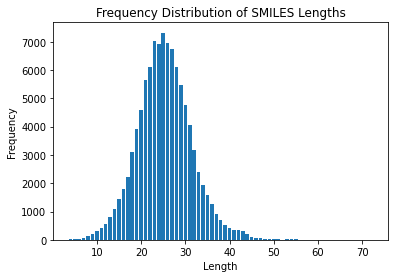

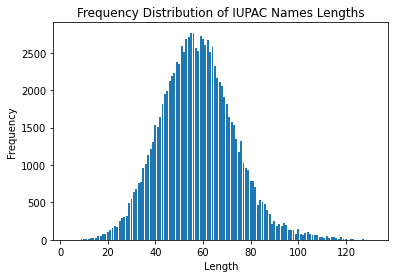

In [10]:
plot_column_length_frequency("Split_STOUT_IWOMI_data.txt")

In [11]:
# Create tokenizers
def preprocess_sentence(w: str) -> str:
    """Preprocesses a sentence by converting to ASCII, adding start and end tokens, and spacing punctuation.

    Args:
        w (str): Input sentence.

    Returns:
        str: Preprocessed sentence.
    """
    w = "<start> " + w + " <end>"
    return w


def create_dataset(path, num_examples):
    lines = io.open(path, encoding="UTF-8").read().strip().split("\n")
    word_pairs = [
        [preprocess_sentence(w) for w in l.split("\t")] for l in lines[:num_examples]
    ]
    print(word_pairs[0])
    return zip(*word_pairs)


def tokenize_input(lang):
    """
    Tokenizes the language dataset and saves the tokenizer to a pickle file.

    Args:
        lang (list): List of strings representing sentences in the language dataset.

    Returns:
        tuple: A tuple containing the tokenized tensor and the tokenizer.
    """
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters="", lower=False)
    lang_tokenizer.fit_on_texts(lang)
    print("Language tokenization done", flush=True)

    with open("tokenizer_smiles.pkl", "wb") as file:
        pickle.dump(lang_tokenizer, file, protocol=4)

    tensor = lang_tokenizer.texts_to_sequences(lang)
    print("Tensor generation done", flush=True)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post")
    print("Padding done", flush=True)

    return tensor, lang_tokenizer


def tokenize_output(lang):
    """
    Tokenizes the language dataset and saves the tokenizer to a pickle file.

    Args:
        lang (list): List of strings representing sentences in the language dataset.

    Returns:
        tuple: A tuple containing the tokenized tensor and the tokenizer.
    """
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters="", lower=False)
    lang_tokenizer.fit_on_texts(lang)
    print("Language tokenization done", flush=True)

    with open("tokenizer_iupac.pkl", "wb") as file:
        pickle.dump(lang_tokenizer, file, protocol=4)

    tensor = lang_tokenizer.texts_to_sequences(lang)
    print("Tensor generation done", flush=True)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post")
    print("Padding done", flush=True)

    return tensor, lang_tokenizer


def load_dataset(path, num_examples=None):
    """
    Loads a dataset from a given path and tokenizes it using the tokenize function.

    Args:
        path (str): Path to the dataset file.
        num_examples (int, optional): Number of examples to load. Defaults to None.

    Returns:
        tuple: A tuple containing the tokenized input tensor and the input language tokenizer.
    """
    # Creating cleaned input
    inp_lang, targ_lang = create_dataset(path, num_examples)
    print("Dataset loaded", flush=True)

    input_tensor, inp_lang_tokenizer = tokenize_input(inp_lang)
    print("Input tensor generation done")
    output_tensor, output_lang_tokenizer = tokenize_output(targ_lang)
    print("Output tensor generation done")

    return input_tensor, inp_lang_tokenizer

In [12]:
# Try experimenting with the size of that dataset
num_examples = 102400
path_to_file = "Split_STOUT_IWOMI_data.txt"
input_tensor, inp_lang = load_dataset(path_to_file, num_examples)

['<start> C O [ C @ H ] 1 O C [ C @ @ H ] ( O ) [ C @ H ] ( O ) [ C @ H ] 1 O <end>', '<start> ( 2 ~ { S } , 3 ~ { R } , 4 ~ { S } , 5 ~ { R } ) - 2 - m e t h o x y t e t r a h y d r o p y r a n - 3 , 4 , 5 - t r i o l <end>']
Dataset loaded
Language tokenization done
Tensor generation done
Padding done
Input tensor generation done
Language tokenization done
Tensor generation done
Padding done
Output tensor generation done


In [13]:
tokenizer_SMILES = pickle.load(open("tokenizer_smiles.pkl", "rb"))
tokenizer_IUPAC = pickle.load(open("tokenizer_iupac.pkl", "rb"))

In [14]:
tokenizer_IUPAC.word_index

{'-': 1,
 'o': 2,
 'y': 3,
 'a': 4,
 'e': 5,
 'i': 6,
 'l': 7,
 't': 8,
 'm': 9,
 'r': 10,
 'n': 11,
 'h': 12,
 '2': 13,
 '{': 14,
 '}': 15,
 'd': 16,
 '~': 17,
 'p': 18,
 '(': 19,
 ')': 20,
 '3': 21,
 'c': 22,
 '<start>': 23,
 '<end>': 24,
 '1': 25,
 ',': 26,
 'x': 27,
 '[': 28,
 ']': 29,
 '4': 30,
 'S': 31,
 'R': 32,
 'z': 33,
 'b': 34,
 'N': 35,
 '5': 36,
 'u': 37,
 '§': 38,
 '6': 39,
 'f': 40,
 's': 41,
 'H': 42,
 '.': 43,
 '7': 44,
 '8': 45,
 '0': 46,
 "'": 47,
 '9': 48,
 '^': 49,
 'E': 50,
 'g': 51,
 'Z': 52,
 '$': 53,
 'q': 54,
 'O': 55,
 'v': 56,
 'C': 57,
 'k': 58,
 '+': 59,
 '"': 60}